In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import test set:


In [3]:
# full train set:
train_df = pd.read_csv('../data/train.csv')

# full test set: 
test_df = pd.read_csv('../data/test.csv')

## Test on best model:

### Best model for SVC: 
#### (in case this is the best prediction model of of the 4)

In [ ]:
# full train set:
train_df = pd.read_csv('../data/train.csv')

# full test set: 
test_df = pd.read_csv('../data/test.csv')

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# same cols:
cols = ['rating', 'funny', 'wow', 'sad', 'likes',
       'disagree', 'sexual_explicit',
       'male', 'female', 'transgender',
       'other_gender', 'heterosexual', 'homosexual_gay_or_lesbian', 'bisexual',
       'other_sexual_orientation', 'christian', 'jewish', 'muslim', 'hindu',
       'buddhist', 'atheist', 'other_religion', 'black', 'white', 'asian',
       'latino', 'other_race_or_ethnicity', 'physical_disability',
       'intellectual_or_learning_disability', 'psychiatric_or_mental_illness',
       'other_disability']


# train data:
train_df["comment_text"] = train_df["comment_text"].fillna("").astype(str)
train_df["label"] = (train_df["toxicity"] >= 0.5).astype(int)
train_df[cols] = train_df[cols].apply(pd.to_numeric, errors="coerce").fillna(0)

X_train_full = train_df[["comment_text"] + cols]
y_train_full = train_df["label"]


# test data:
test_df["comment_text"] = test_df["comment_text"].fillna("").astype(str)
test_df["label"] = (test_df["toxicity"] >= 0.5).astype(int)
test_df[cols] = test_df[cols].apply(pd.to_numeric, errors="coerce").fillna(0)

X_test_final = test_df[["comment_text"] + cols]
y_test_final = test_df["label"]

In [ ]:
# final model
final_preprocess = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(
            stop_words="english",
            ngram_range=(1, 1),
            min_df=10
        ), "comment_text"),
        ("num", StandardScaler(), cols),
    ]
)

final_svm = Pipeline([
    ("preprocess", final_preprocess),
    ("svm", LinearSVC(C=1, random_state=42, max_iter=10000))
])
# fit final model on ALL training data:
final_svm.fit(X_train_full, y_train_full)
# predict & scores:
y_test_pred = final_svm.predict(X_test_final)

print("Final test accuracy:", accuracy_score(y_test_final, y_test_pred))
print(classification_report(y_test_final, y_test_pred))

Final test accuracy: 0.9489227414579499
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    367632
           1       0.79      0.50      0.61     32272

    accuracy                           0.95    399904
   macro avg       0.87      0.74      0.79    399904
weighted avg       0.94      0.95      0.94    399904



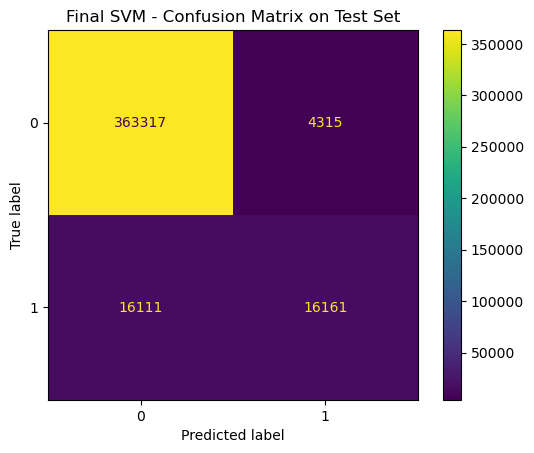

In [9]:
# confusion matrix for best SVC model:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_final, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title("Final SVM - Confusion Matrix on Test Set")
plt.show()